In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation,PillowWriter
%matplotlib notebook

In [7]:
df=pd.read_csv('DGB.csv',index_col='todate',encoding='utf8')
df

,Isfahan,Alborz,Ahvaz,Tabriz,EastTehran,WestTehran,Zahedan,Sari,Shiraz,Ghom,Kerman,Kermanshah,Gilan,Mashhad
todate,,,,,,,,,,,,,,
140101,0.858543,0.956329,1.039918,0.665385,0.864813,0.934775,0.943249,0.860733,0.997831,0.761625,0.964988,0.691854,1.031544,0.859090
140101-140102,0.891077,0.891157,0.957983,0.677400,0.778464,0.822982,0.926152,0.765145,0.943360,0.820334,0.875650,0.658832,0.940897,0.856946
140101-140103,0.887928,0.865891,0.939374,0.629775,0.710149,0.829005,0.938187,0.801424,0.953916,0.815064,0.901498,0.746209,0.903274,0.853238
140101-140104,0.963177,0.930782,0.975397,0.674853,0.792784,0.904614,0.864979,0.886071,1.006130,0.869202,0.939441,0.806017,0.980524,0.927233
140101-140105,0.984042,0.939160,0.957285,0.702978,0.758833,0.893552,0.900112,0.914734,1.006773,0.887654,0.904518,0.821698,0.988301,0.923263
140101-140106,0.957732,0.924040,0.874484,0.694824,0.721585,0.831369,0.894293,0.873325,0.984224,0.889393,0.910667,0.806179,0.901498,0.873450
140101-140107,0.975967,0.940890,0.912066,0.734259,0.751249,0.845234,0.915218,0.904685,1.016020,0.906738,0.915268,0.846311,0.899847,0.878785
140101-140108,0.981338,0.951790,0.915838,0.756892,0.774337,0.847603,0.906477,0.927166,1.021073,0.906206,0.921019,0.861659,0.899117,0.884072
140101-140109,0.981546,0.967064,0.930172,0.777122,0.787038,0.805075,0.933114,0.942254,1.039134,0.898113,0.957031,0.875431,0.905231,0.899311


In [8]:
def expand_df_maker(df,interpolation=20):
    
    branch_list=df.columns
    todates=np.sort(df.index)
    
    df.index=np.arange(interpolation,(len(todates)+1)*interpolation,interpolation)-1
    
    row_nums = [i for i in range(0,len(todates)*interpolation) if i not in df.index ]
    empty = pd.DataFrame(np.nan, index= row_nums, columns = df.columns)

    expand_df = pd.concat([df, empty]).sort_index()
    expand_df.iloc[0]=0

    rank_df = expand_df.rank(axis=1,method='first')
    rank_df = rank_df.interpolate()

    expand_df = expand_df.interpolate()
    expand_df.index=np.repeat(todates,interpolation)
       
    return expand_df,rank_df

In [9]:
expand_df,rank_df=expand_df_maker(df)

<IPython.core.display.Javascript object>


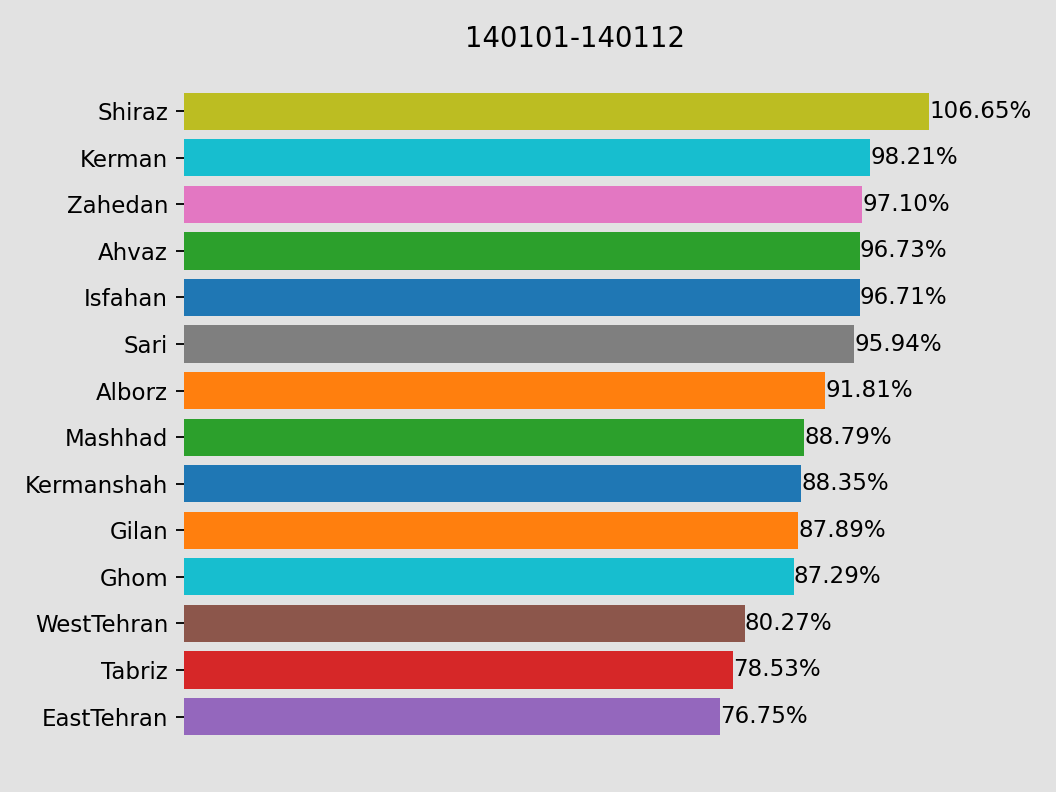

In [10]:
def update(i):
    ax.clear()
    ax.set_facecolor(plt.cm.Greys(0.2))
    [spine.set_visible(False) for spine in ax.spines.values()]
    hbars = ax.barh(y = rank_df.iloc[i].values,
           tick_label=expand_df.iloc[i].index,
           width = expand_df.iloc[i].values,
           height = 0.8,
           color = plt.cm.tab10(range(11))
           )
    ax.set_title(expand_df.index[i])
    ax.bar_label(hbars, labels=["" if x==0 else f'{x:.2%}' for x in hbars.datavalues])
    ax.set_xticks([])

fig,ax = plt.subplots(#figsize=(10,7),
                      facecolor = plt.cm.Greys(0.2),
                      dpi = 150,
                      tight_layout=True
                     )


data_anime = FuncAnimation(
    fig = fig,
    func = update,
    frames= len(expand_df),
    interval=140, repeat=False
)

animation_filename = 'animation.gif'
gif_writer = PillowWriter(fps=7)
data_anime.save(animation_filename, writer=gif_writer)

plt.show()